In [1]:
%matplotlib inline 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import xarray
import xarray.ufuncs as xu
import dask
import seaborn as sn
from datetime import datetime
from dask.diagnostics import ProgressBar
import netCDF4
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Open forcings netcdf file and check the contents
ds = xarray.open_dataset('/datadrive/himat/N37_0E74_0_agg_16_FORCING_POST_WY2007_08.nc')
ds

In [3]:
# At time coordinates instead of n days
ds.coords['time'] = pd.date_range('2007-10-01', periods=366)
ds

In [39]:
# Create a new precipitation variable that uses time instead of n days
ds['prec'] = (('time', 'Longitude', 'Latitude'), ds.PPT_Post.values)

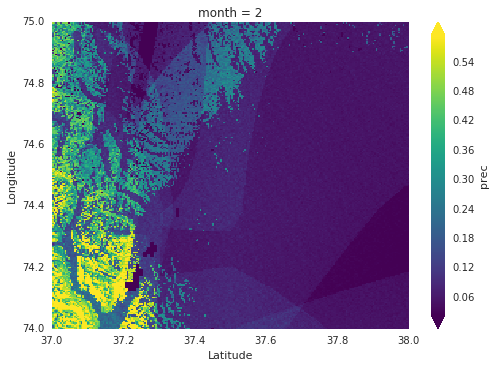

In [53]:
# Calculate monthly mean and produce spatial plot

ds_by_month = ds.prec.groupby('time.month').mean('time')
prec_month = ds_by_month.sel(month=2)
with ProgressBar():
    prec_month.plot(robust=True)


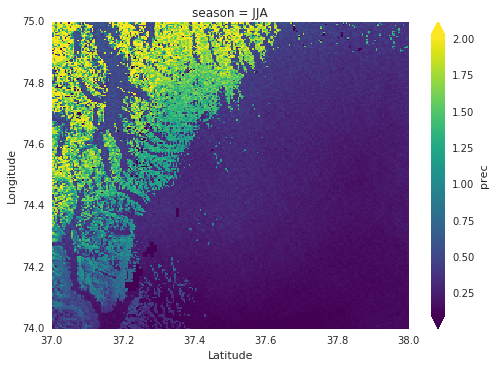

In [8]:
# Plot precipitation by season

ds_by_season = ds.prec.groupby('time.season').mean('time')
prec_seasonal = ds_by_season.sel(season='JJA')
with ProgressBar():
    prec_seasonal.plot(robust=True)

In [54]:
#Open SWE netcdf file, add a time dimension and check the contents

ds_swe = xarray.open_dataset('/datadrive/himat/N37_0E74_0_agg_16_SWE_SCA_POST_WY2007_08.nc')
ds_swe.coords['time'] = pd.date_range('2007-10-01', periods=366)
ds_swe

<xarray.Dataset>
Dimensions:    (Day: 366, Latitude: 225, Longitude: 225, Stats: 5, time: 366)
Coordinates:
  * Latitude   (Latitude) float64 38.0 37.99 37.99 37.98 37.98 37.98 37.97 ...
  * Longitude  (Longitude) float64 74.0 74.01 74.01 74.02 74.02 74.02 74.03 ...
  * Day        (Day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * Stats      (Stats) int64 0 1 2 3 4
  * time       (time) datetime64[ns] 2007-10-01 2007-10-02 2007-10-03 ...
Data variables:
    SWE_Post   (Day, Stats, Longitude, Latitude) float64 0.0 0.0 0.0 0.0 0.0 ...
    SCA_Post   (Day, Stats, Longitude, Latitude) float64 0.0 0.0 0.0 0.0 0.0 ...

In [55]:
# Add a new variable called swe_post that has the dimensions time, Stats, Lon & Lat
ds_swe['swe_post'] = (('time', 'Stats', 'Longitude', 'Latitude'), ds_swe.SWE_Post.values)

In [56]:
ds_swe_med = ds_swe.swe_post.isel(Stats=[3])

In [25]:
ds_swe_by_season = ds_swe_med.groupby('time.season').mean('time')

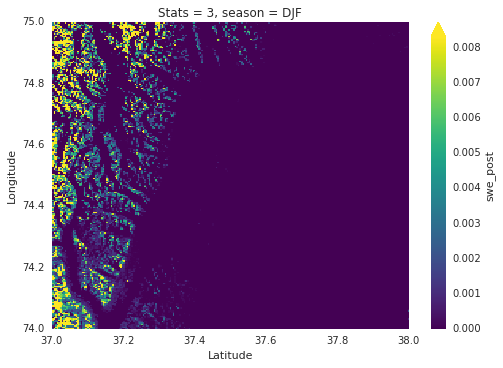

In [26]:
swe_seasonal = ds_swe_by_season.sel(season='DJF')
with ProgressBar():
    swe_seasonal.plot(robust=True)